In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
data = pd.read_csv('/Users/dhruvkumar/Desktop/dataset()/weatherAUS.csv')

In [59]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


## Filtering Everything Down

In [60]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [61]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [62]:
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25] # the parameter contains less the 25 entries.

In [63]:
print(discrete_feature) # they will not have considerale effect.

['Cloud9am', 'Cloud3pm']


In [64]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

In [65]:
print(continuous_feature) # These are the features which are going to help us...

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [66]:
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]

In [67]:
print(categorical_feature) # here, numerical values are not given , so we have to convert it in order to get a model running.

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [68]:
# Just qunatatively getting the whole thing.
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [69]:
data.isnull().sum()*100/len(data) # this will help us to handle missing values. # this shows how much percentage of data is missing.

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

## Random Sample Imputation   
__Random Sample Imputation take a random observation from the feature.   
After that we use random observation to replace NaN in that feature.   
It should be used when data is missing completely at random (MCAR)__  
__MCAR --> Missing Completely at Random__

In [70]:
# here we will do some random sampling for the some parameters.
def randomsampleimputation(data, variable):
    data[variable]=data[variable]
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable]=random_sample

In [71]:
# Appling to get the missing data. # we have taken these parametes only as they has the most %age of data missing.
randomsampleimputation(data, "Cloud9am")
randomsampleimputation(data, "Cloud3pm")
randomsampleimputation(data, "Evaporation")
randomsampleimputation(data, "Sunshine")

In [72]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,5.2,11.6,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,8.0,5.0,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,3.8,8.5,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,8.0,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,6.4,5.8,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,8.0,7.0,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,3.0,6.1,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,1.0,8.0,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,0.6,9.7,W,28.0,S,...,58.0,27.0,1007.0,1005.7,1.0,3.0,20.1,28.2,Yes,No


Now use corr() function to find the correlation among the columns. It will use all the numeric columns in the dataframe to get the correlation.

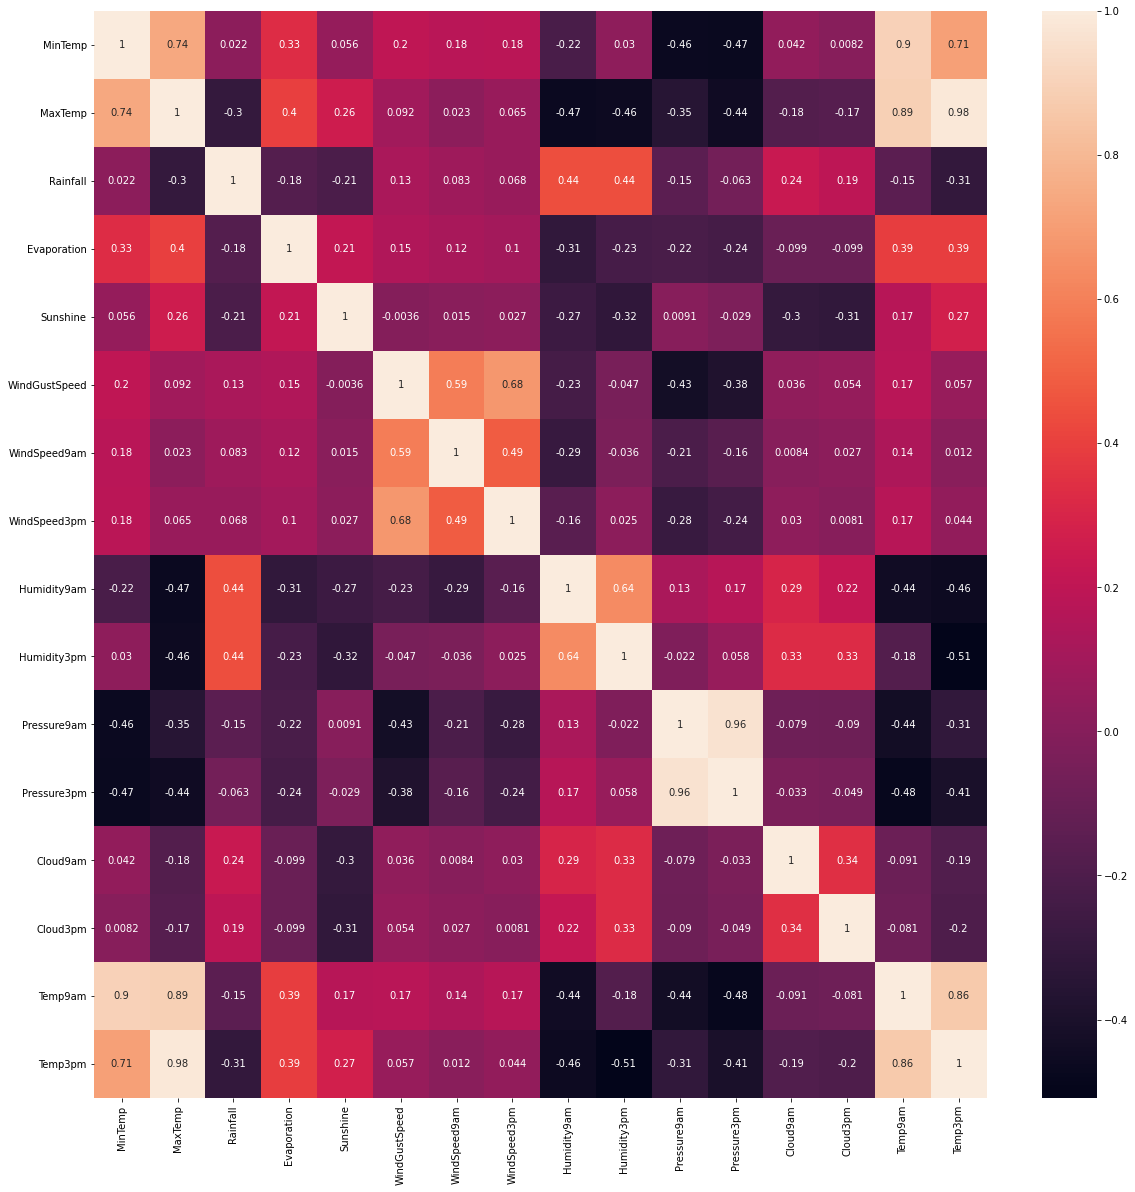

In [73]:
import seaborn as sns
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


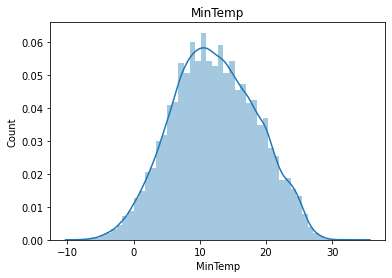

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


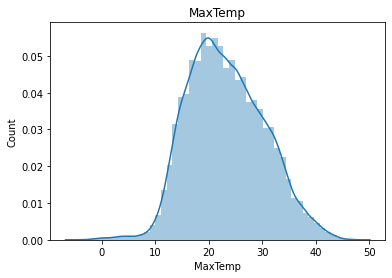

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


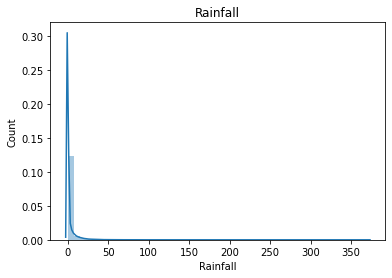

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


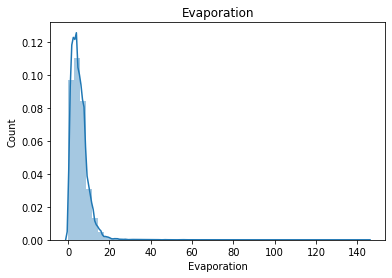

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


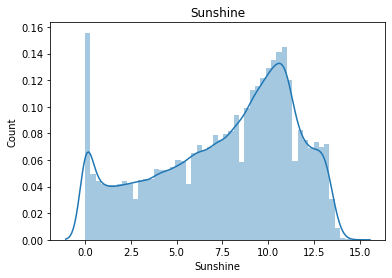

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


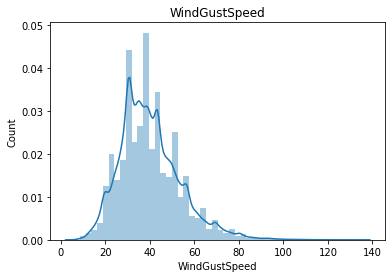

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


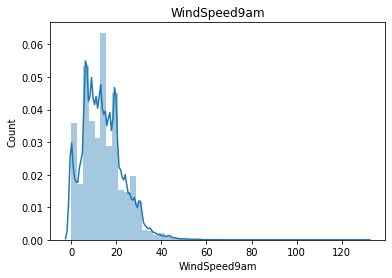

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


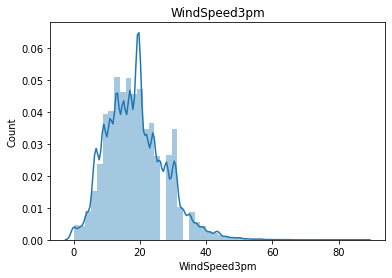

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


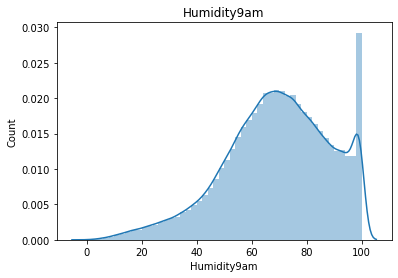

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


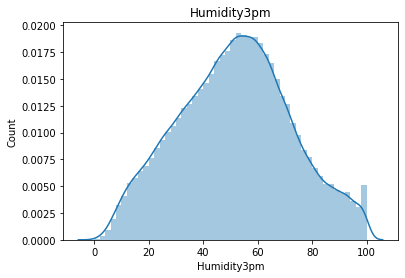

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


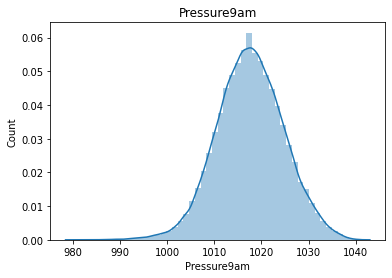

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


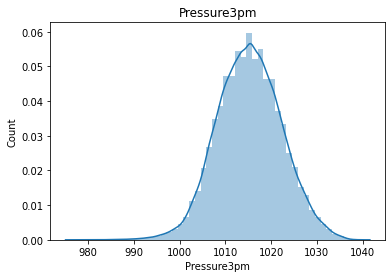

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


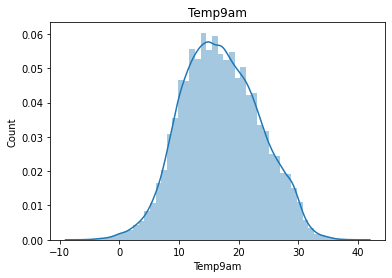

<Figure size 1080x1080 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


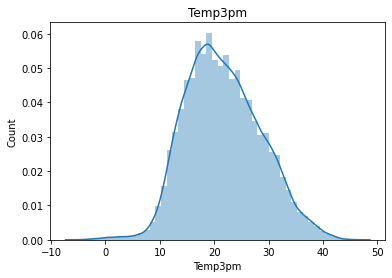

<Figure size 1080x1080 with 0 Axes>

In [74]:
# let's get some graphical representation for all the continuous features
for feature in continuous_feature:
    data1=data.copy()
    sns.distplot(data1[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

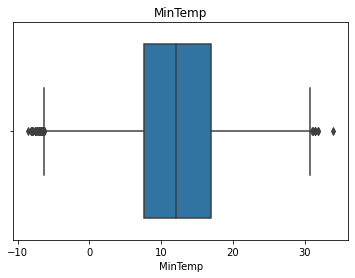

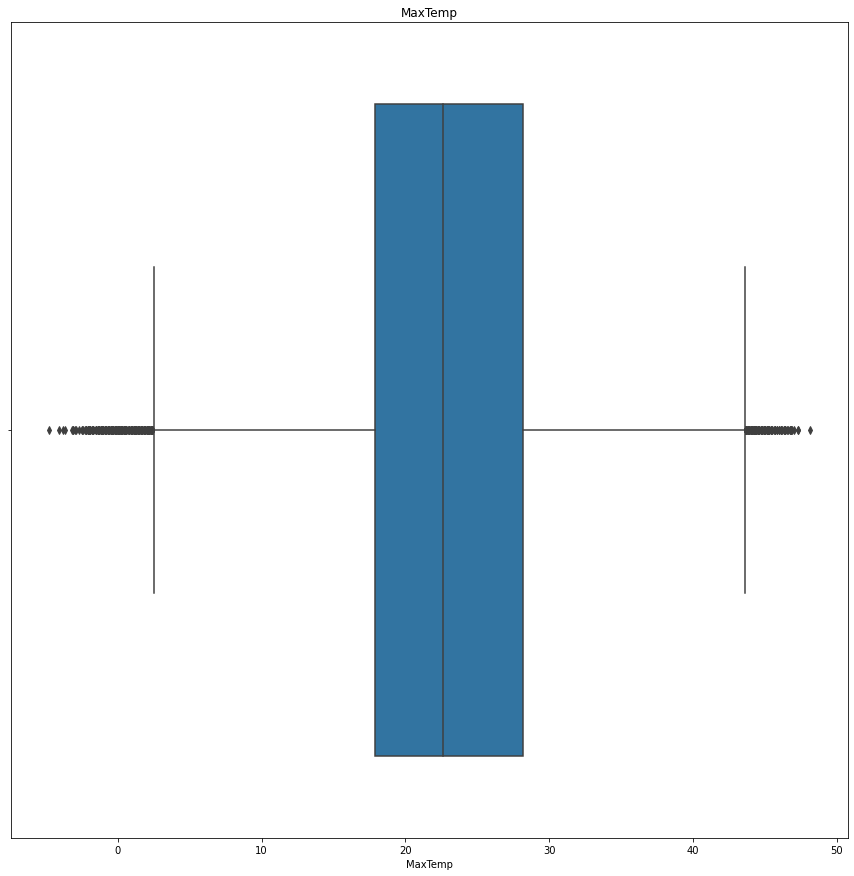

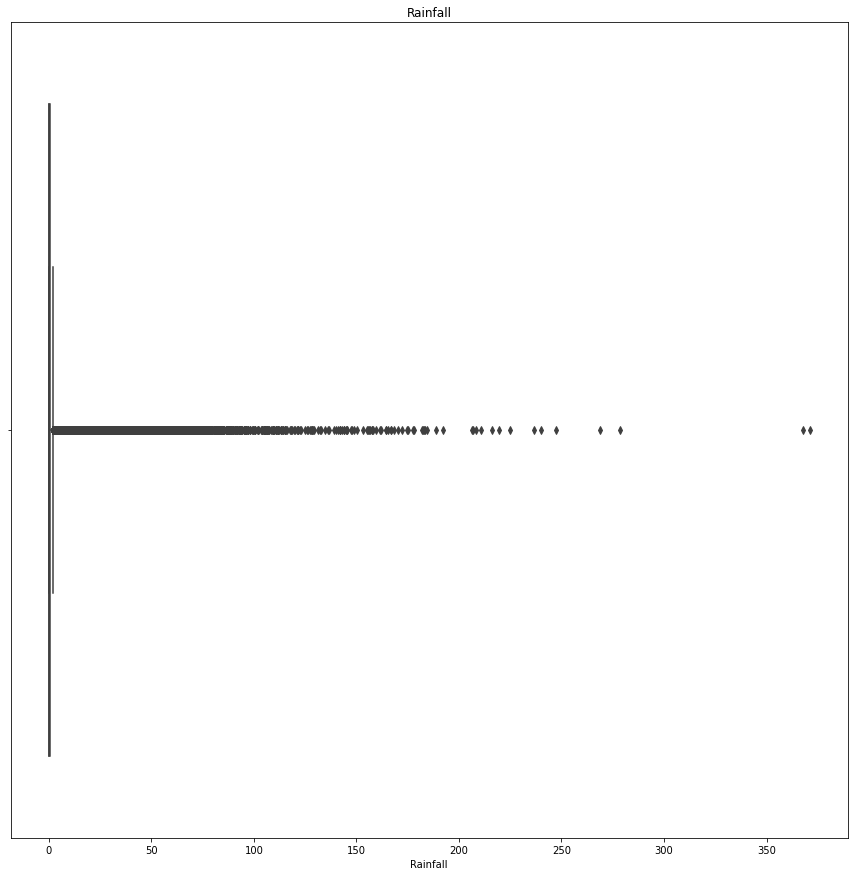

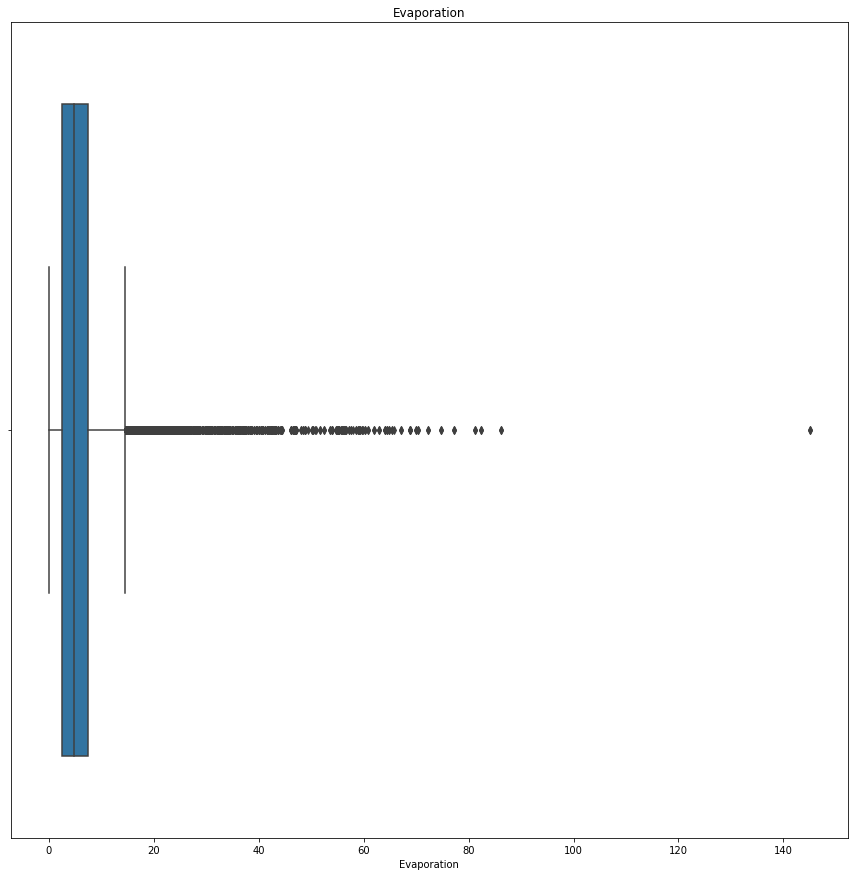

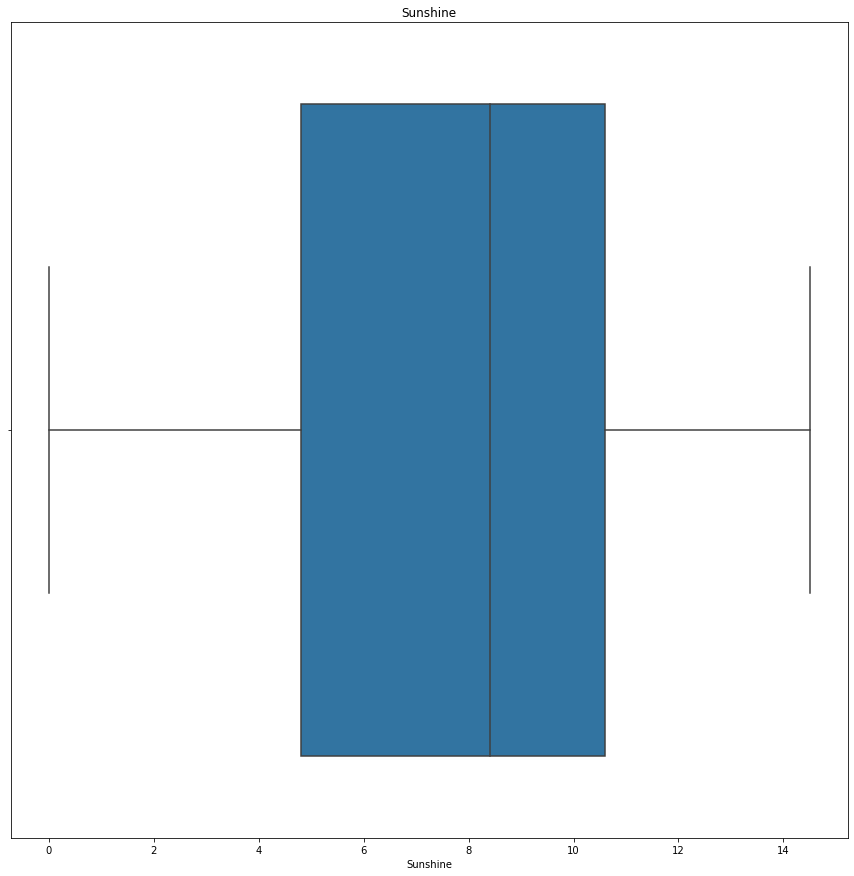

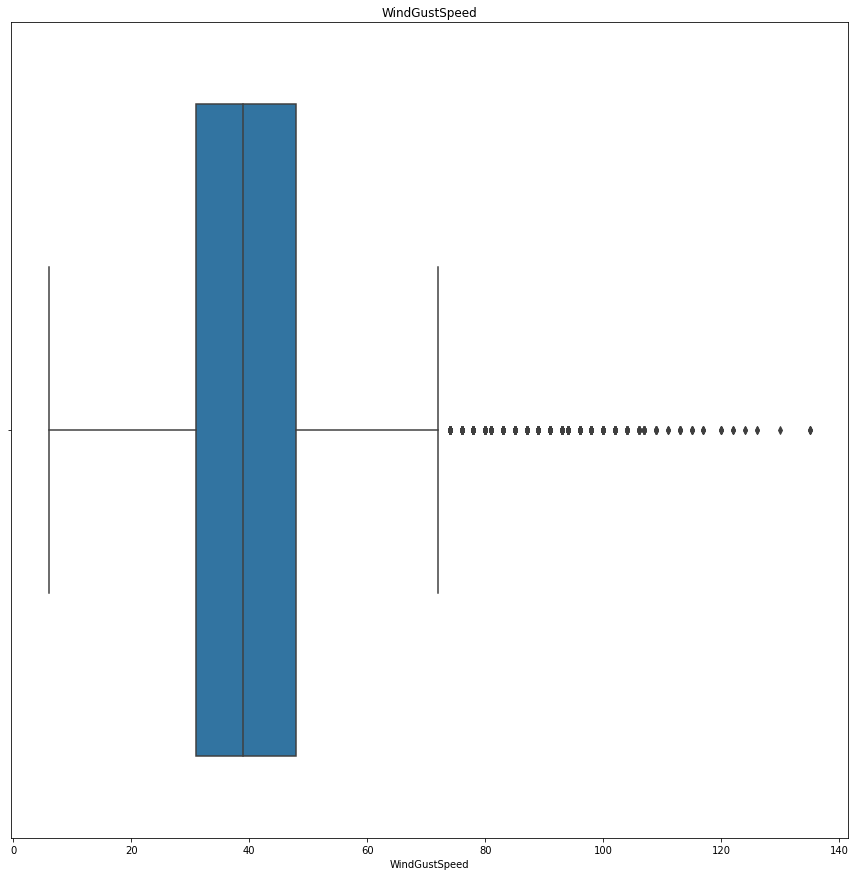

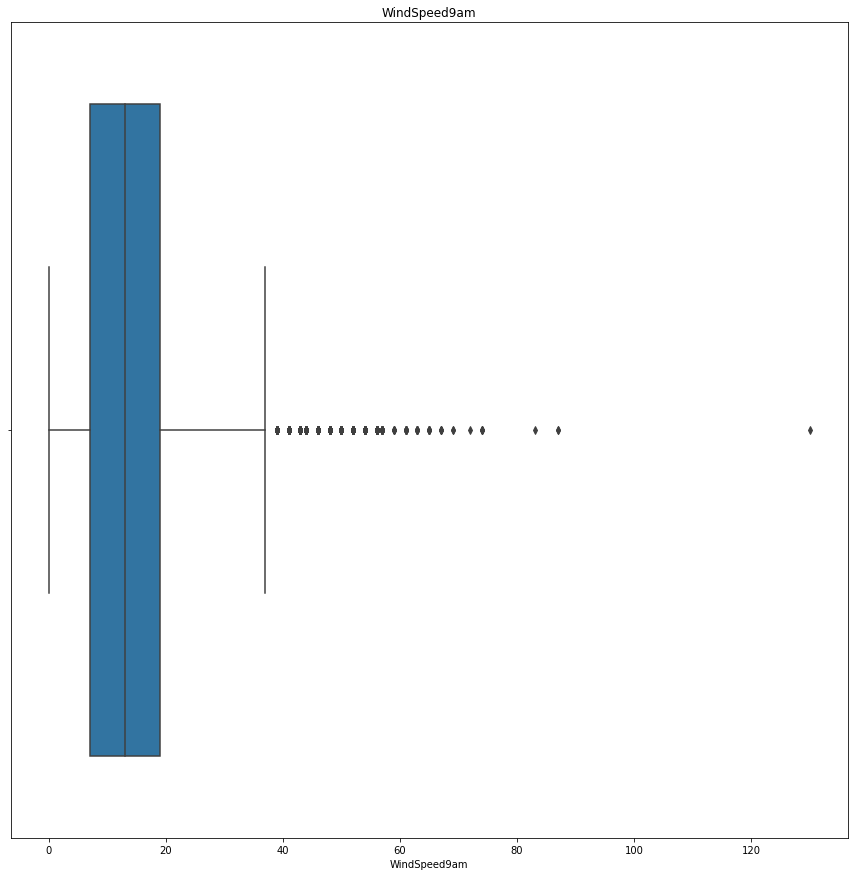

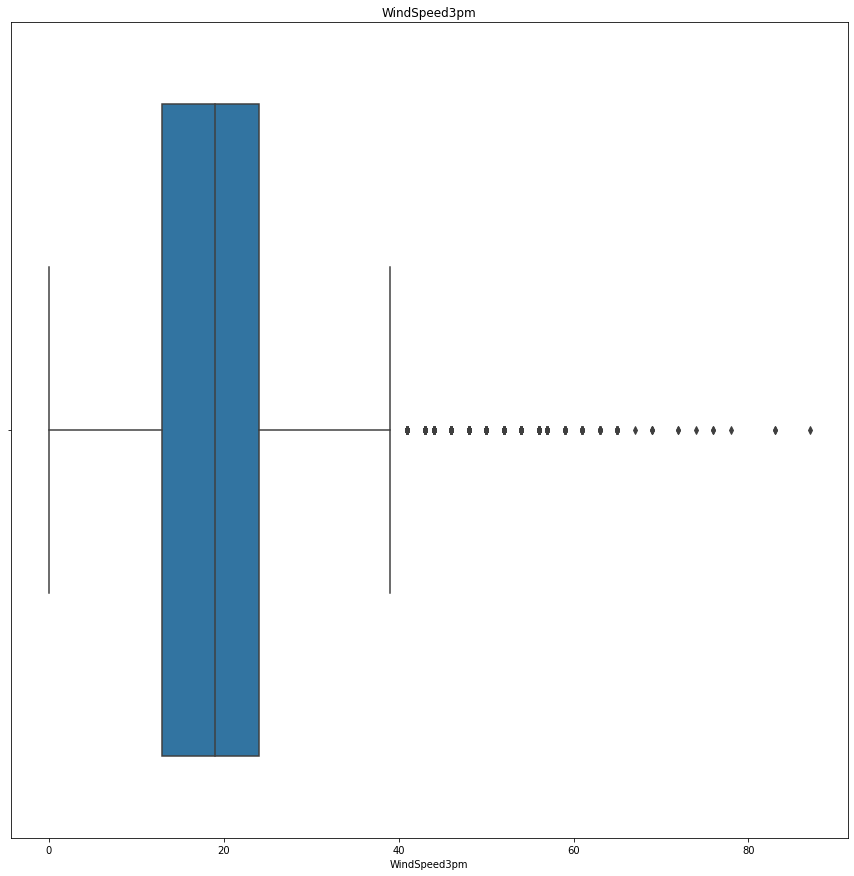

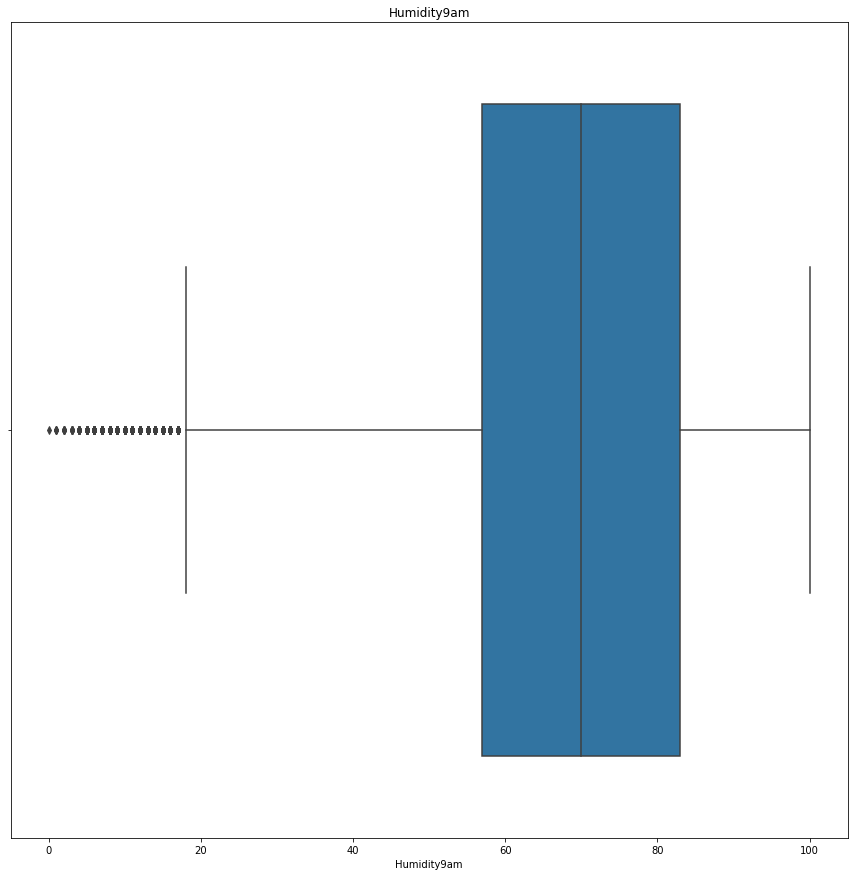

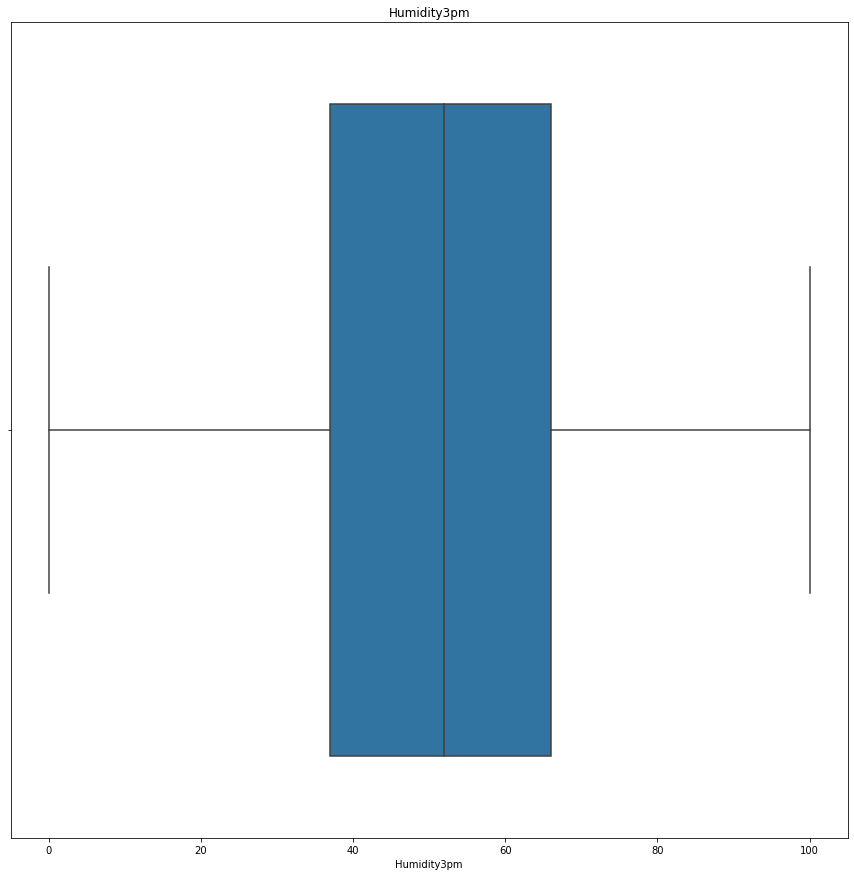

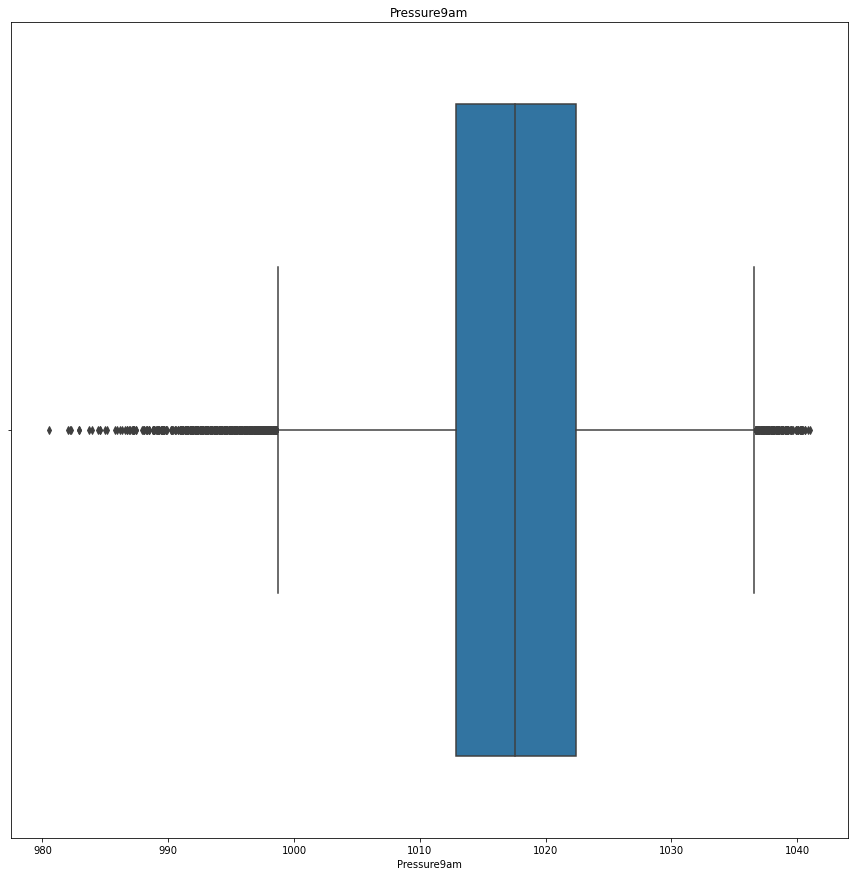

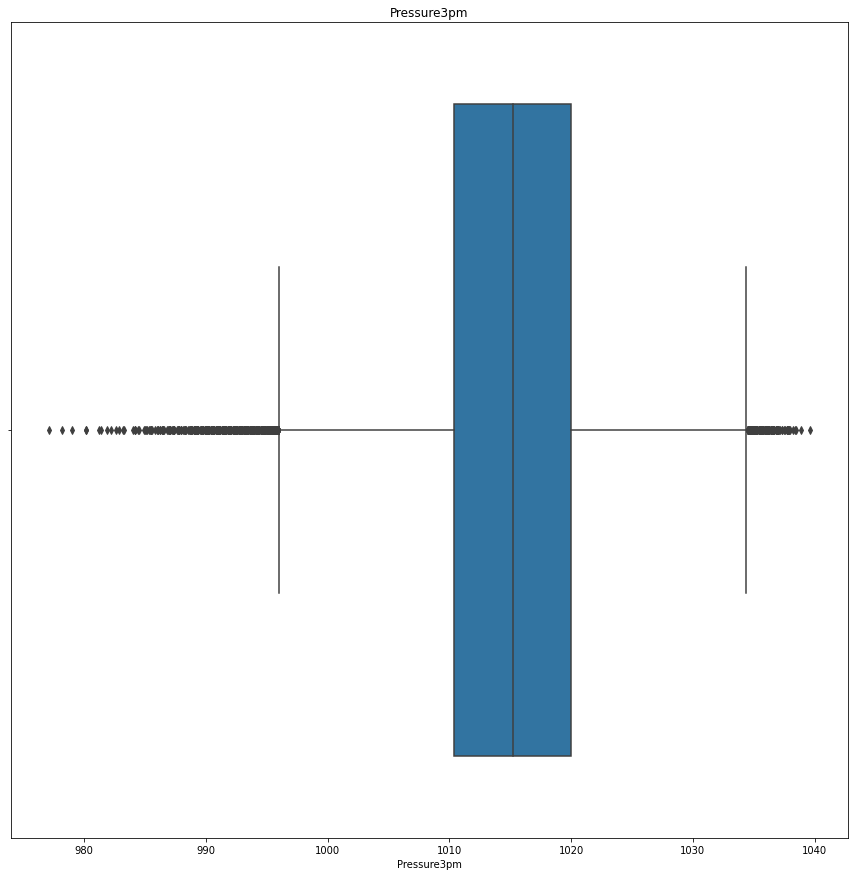

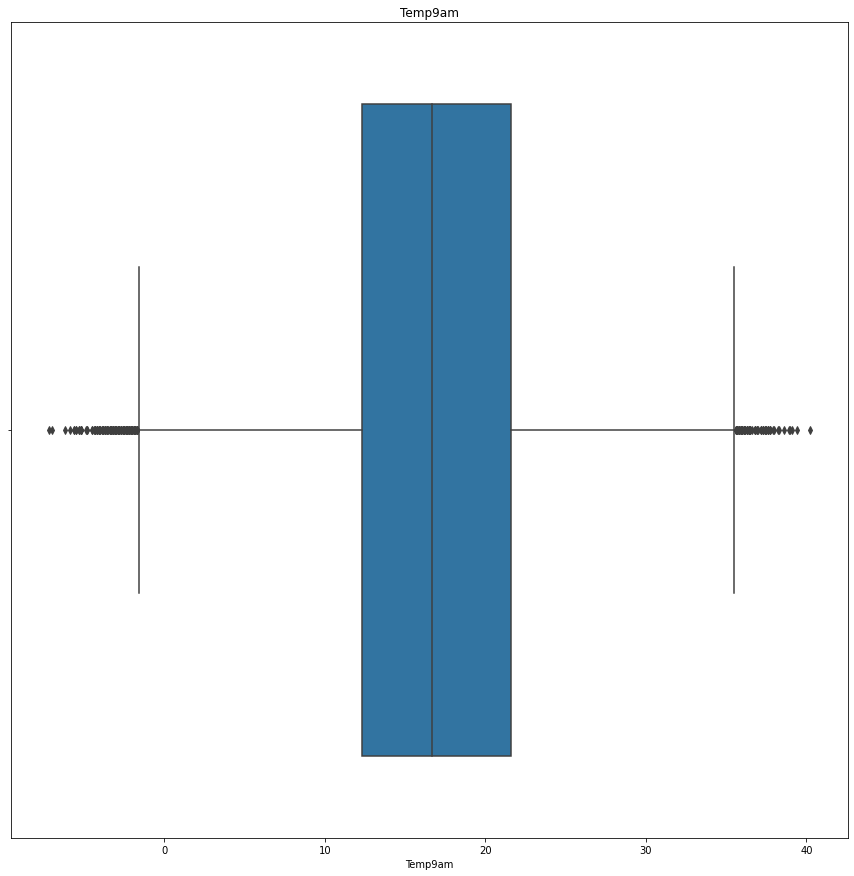

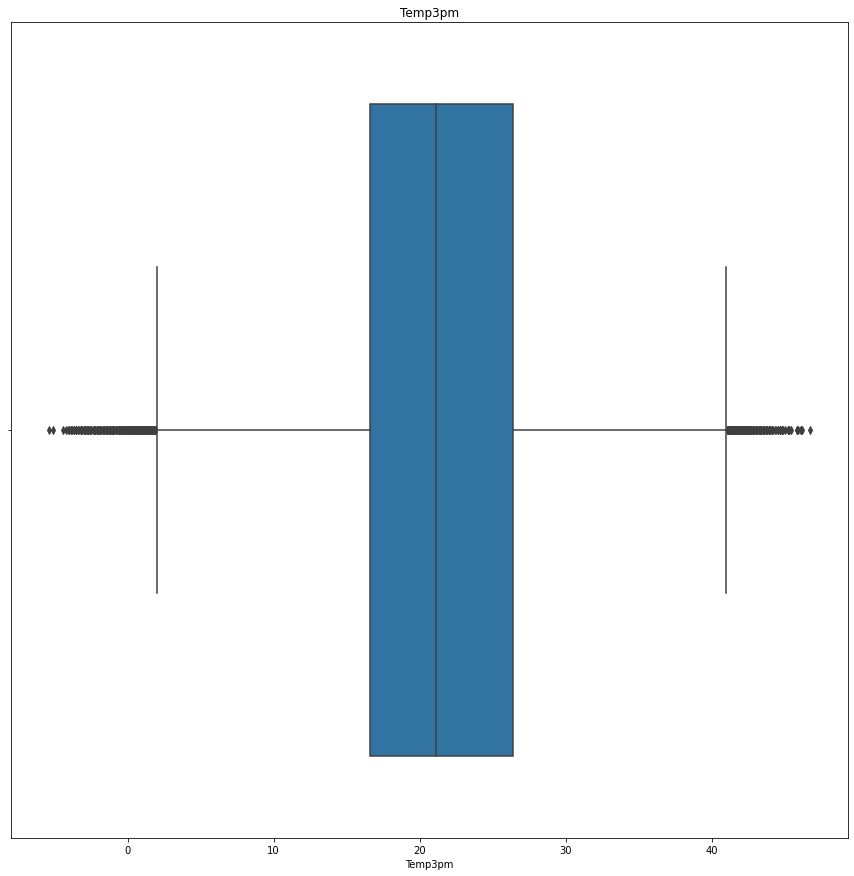

<Figure size 1080x1080 with 0 Axes>

In [75]:
# A for loop is used to plot a boxplot for all the continuous features to see the outliers
# Know what box plot does https://www.youtube.com/watch?v=b2C9I8HuCe4
for feature in continuous_feature:
    data2=data.copy()
    sns.boxplot(data1[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [76]:
# so now we will fill in all the missing data points in contineos feature with their corresponding median quantity.
for feature in continuous_feature:
    if(data[feature].isnull().sum()*100/len(data))>0:
        data[feature] = data[feature].fillna(data[feature].median())

In [77]:
data.isnull().sum()*100/len(data)
# we almost got it. now it make it perfect.

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [78]:
# discrete_feature
def mode_nan(data,variable):
    mode=data[variable].value_counts().index[0]
    data[variable].fillna(mode,inplace=True)
mode_nan(data,"Cloud9am")
mode_nan(data,"Cloud3pm")

In [79]:
# Let' do it:  0 for no rain and 1 for no-rain
data["RainToday"] = pd.get_dummies(data["RainToday"], drop_first = True)
data["RainTomorrow"] = pd.get_dummies(data["RainTomorrow"], drop_first = True)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [80]:
for feature in categorical_feature:
    print(feature, (data.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [81]:
# Numerical conversion of the Wind direction
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}

data["WindGustDir"] = data["WindGustDir"].map(windgustdir)
data["WindDir9am"] = data["WindDir9am"].map(winddir9am)
data["WindDir3pm"] = data["WindDir3pm"].map(winddir3pm)

In [82]:
data["WindGustDir"] = data["WindGustDir"].fillna(data["WindGustDir"].value_counts().index[0])
data["WindDir9am"] = data["WindDir9am"].fillna(data["WindDir9am"].value_counts().index[0])
data["WindDir3pm"] = data["WindDir3pm"].fillna(data["WindDir3pm"].value_counts().index[0])

In [83]:
data.isnull().sum()*100/len(data) # Now we are all set to go...

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [84]:
# class sklearn.preprocessing. LabelEncoder[source] Encode target labels with value between 0 and n_classes-1.
#This transformer should be used to encode target values, i.e. y , and not the input X .
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder() 
data['Location']= encoder.fit_transform(data['Location']) 

In [85]:
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [86]:
# we have individually accessed the date column.
data["Date_year"] = data["Date"].dt.year
data["Date_month"] = data["Date"].dt.month
data["Date_day"] = data["Date"].dt.day

In [87]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_year,Date_month,Date_day
0,2008-12-01,2,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,...,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,...,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,...,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,...,1012.8,0.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
5,2008-12-06,2,14.6,29.7,0.2,5.2,11.6,2.0,56.0,5.0,...,1005.4,8.0,5.0,20.6,28.9,0,0,2008,12,6
6,2008-12-07,2,14.3,25.0,0.0,3.8,8.5,4.0,50.0,7.0,...,1008.2,1.0,8.0,18.1,24.6,0,0,2008,12,7
7,2008-12-08,2,7.7,26.7,0.0,6.4,5.8,4.0,35.0,11.0,...,1010.1,8.0,7.0,16.3,25.5,0,0,2008,12,8
8,2008-12-09,2,9.7,31.9,0.0,3.0,6.1,0.0,80.0,13.0,...,1003.6,1.0,8.0,18.3,30.2,0,1,2008,12,9
9,2008-12-10,2,13.1,30.1,1.4,0.6,9.7,4.0,28.0,10.0,...,1005.7,1.0,3.0,20.1,28.2,1,0,2008,12,10


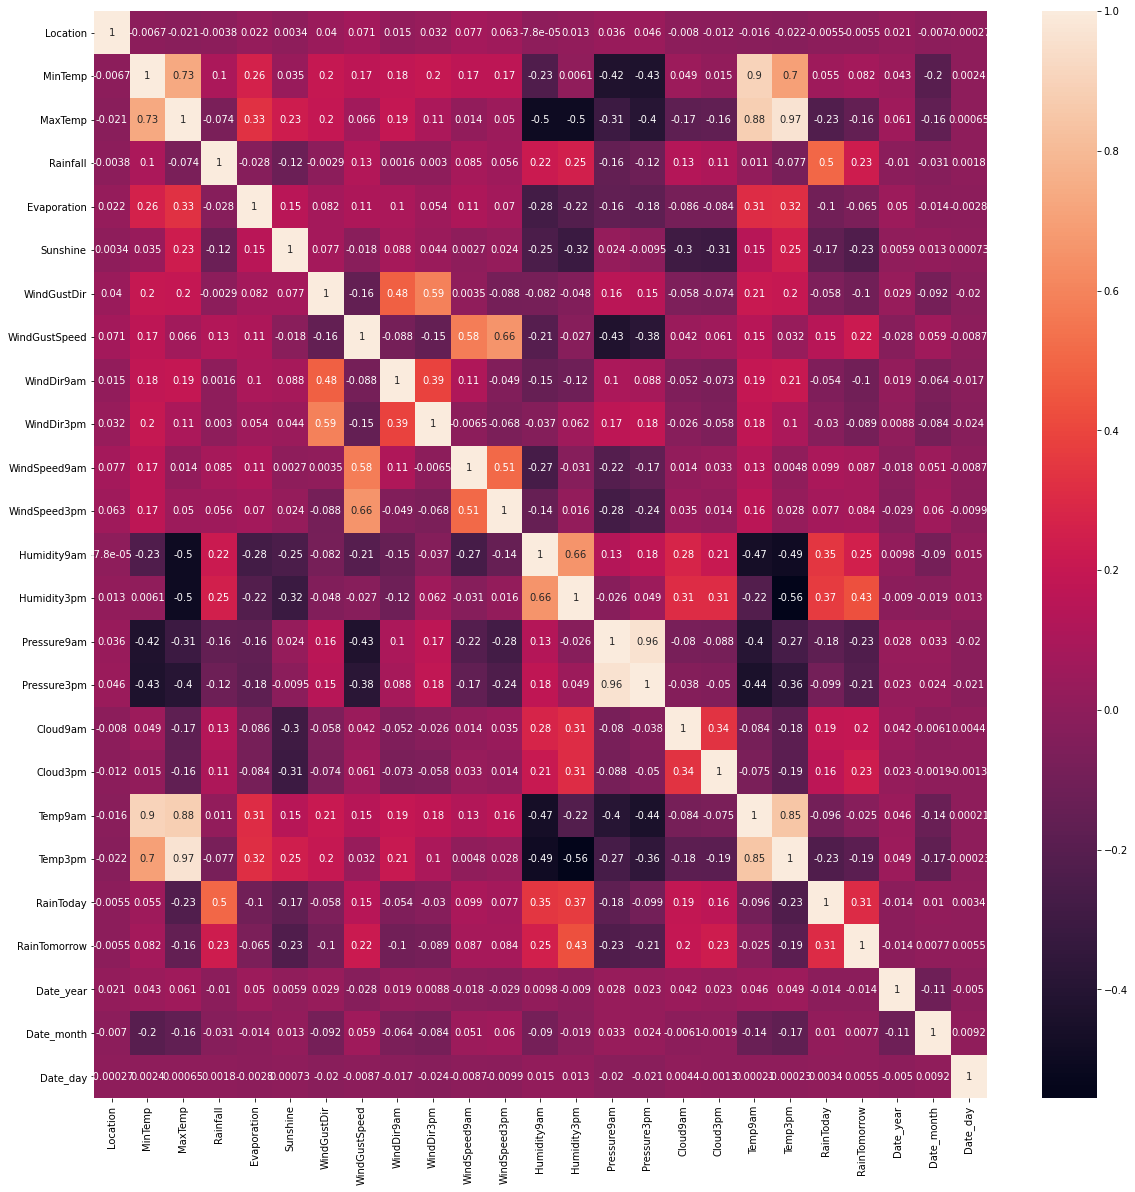

In [88]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

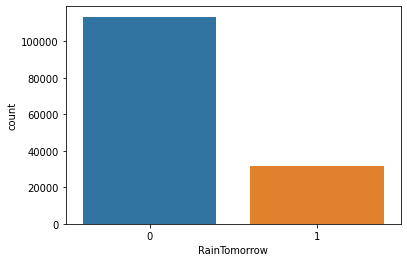

In [89]:
sns.countplot(data["RainTomorrow"]) # 0 --> No rain and 1 --> Yes rain

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

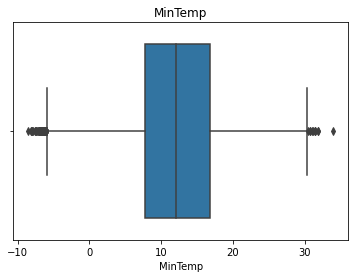

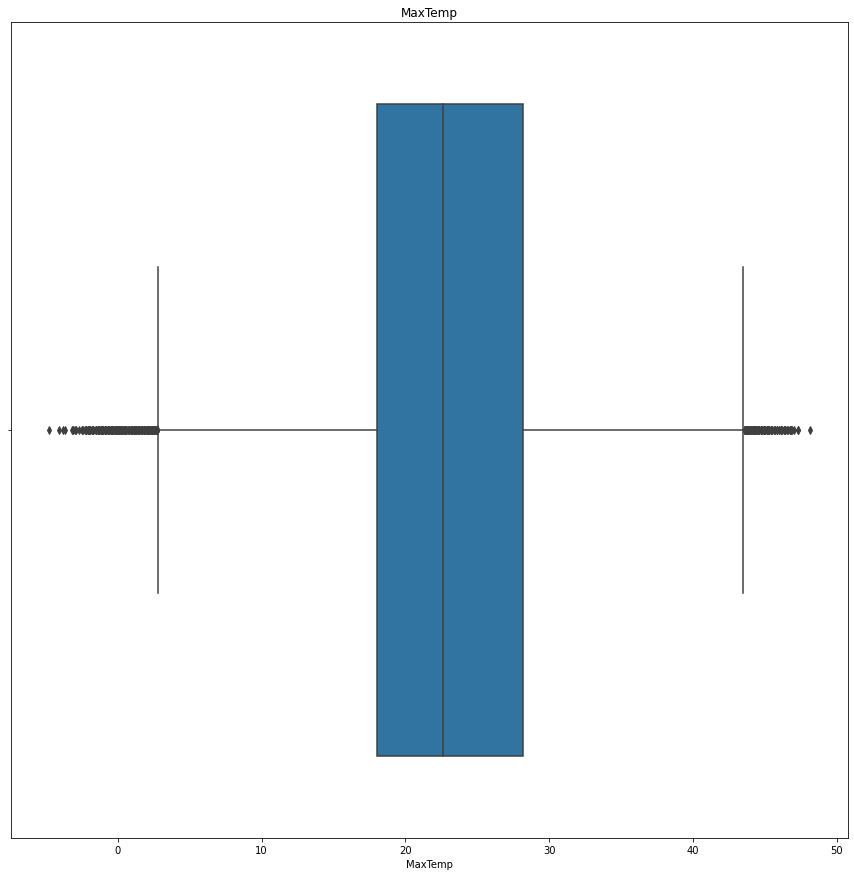

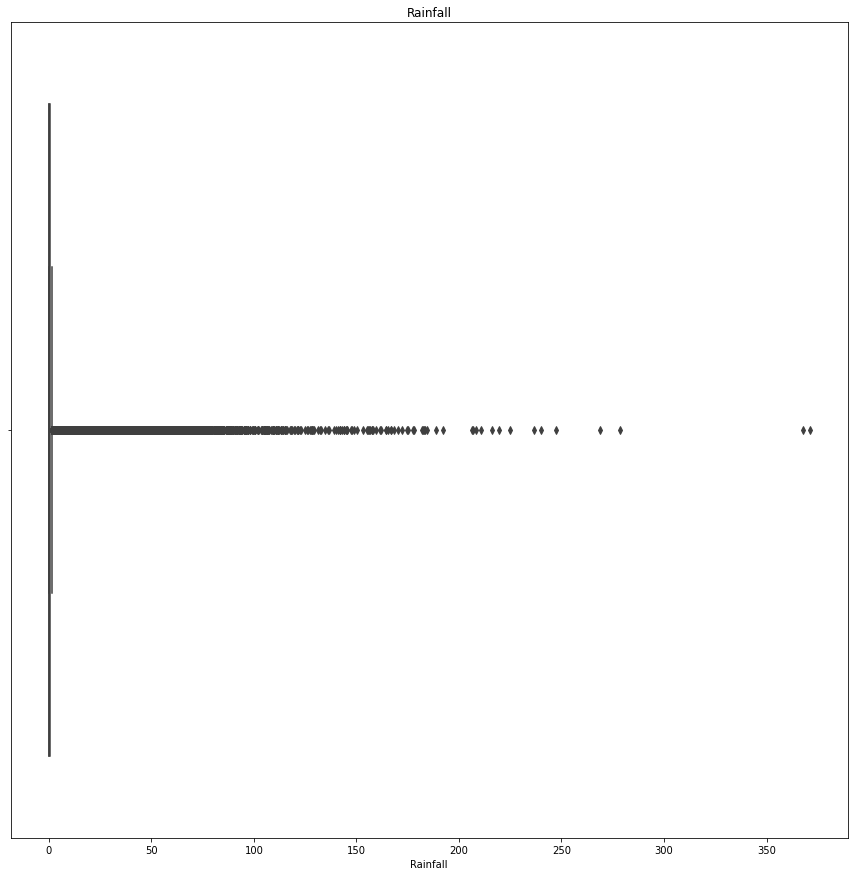

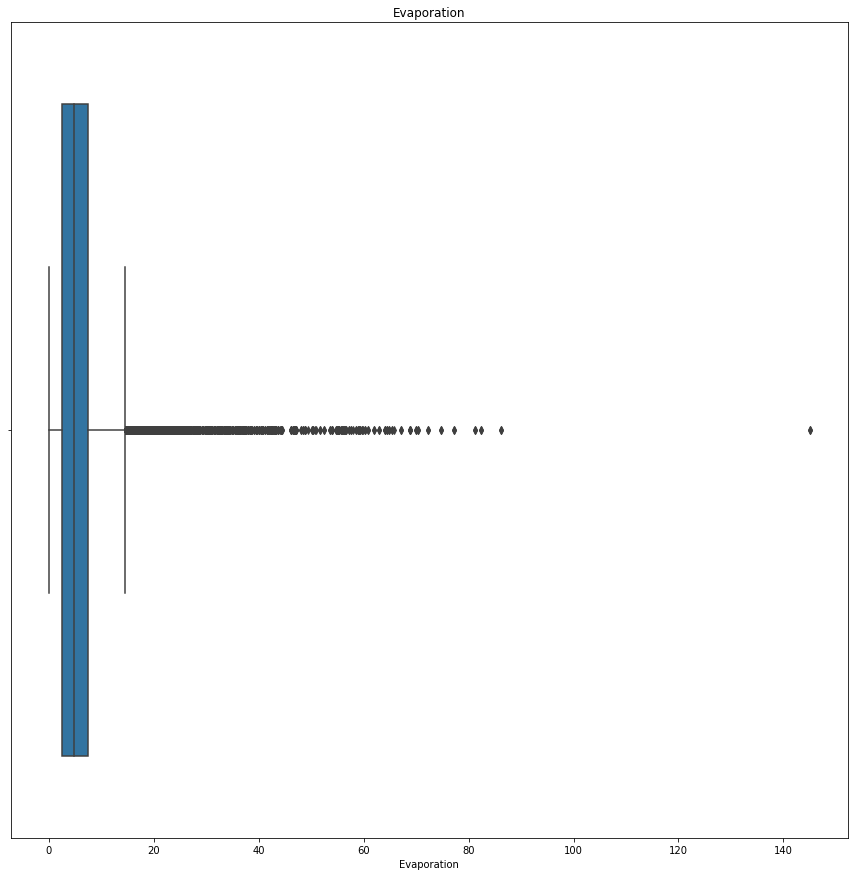

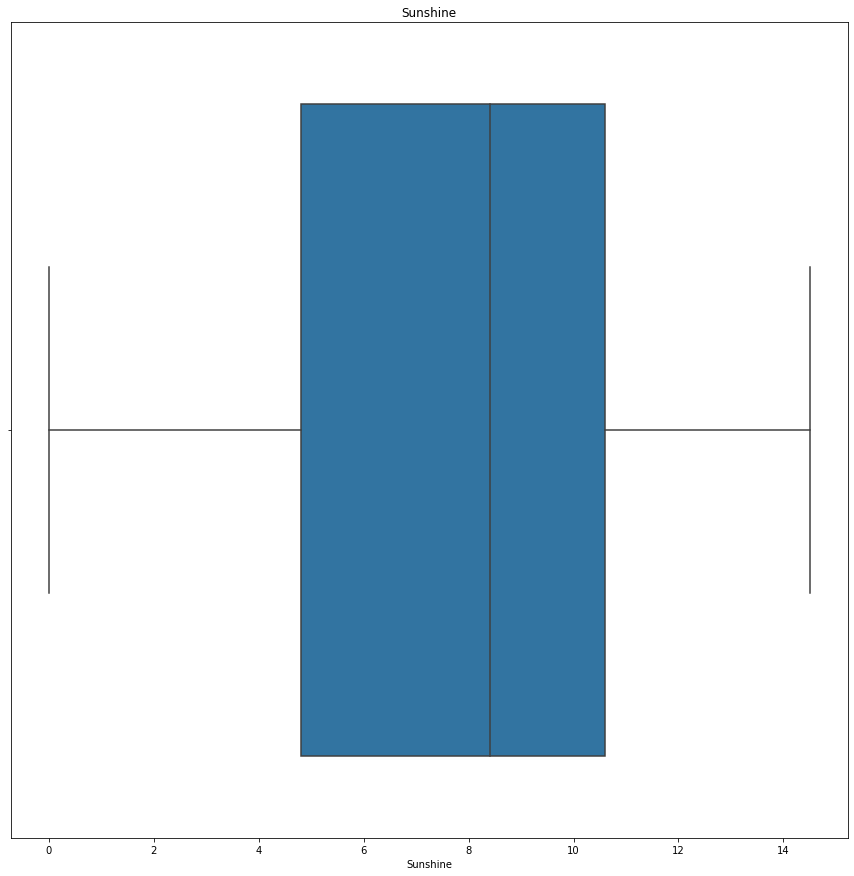

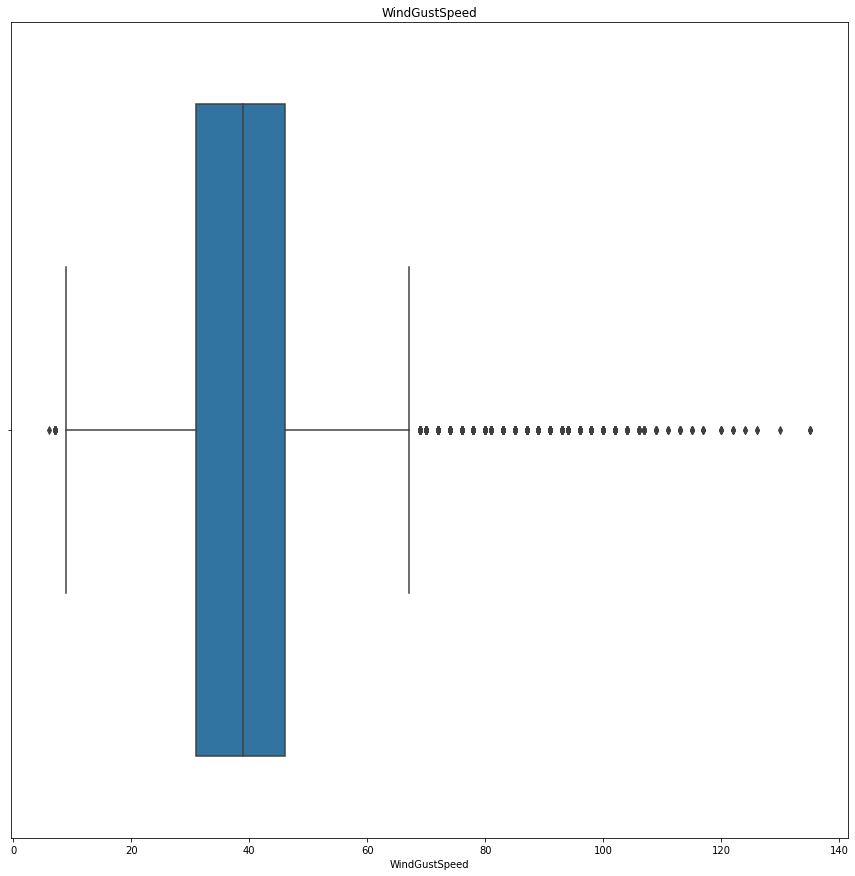

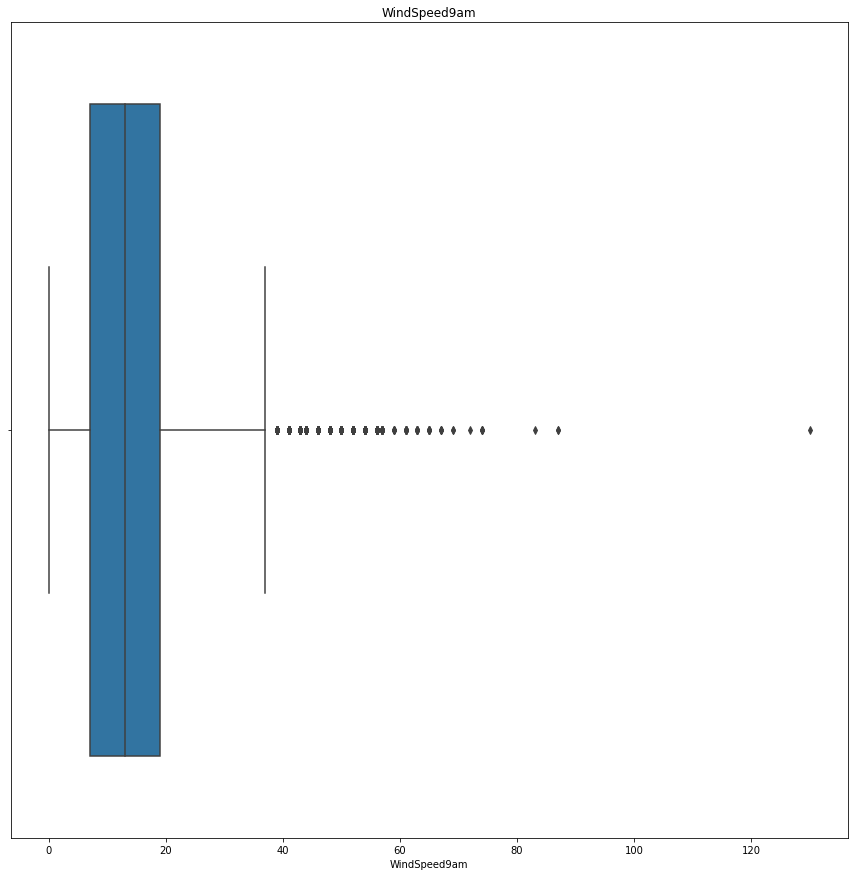

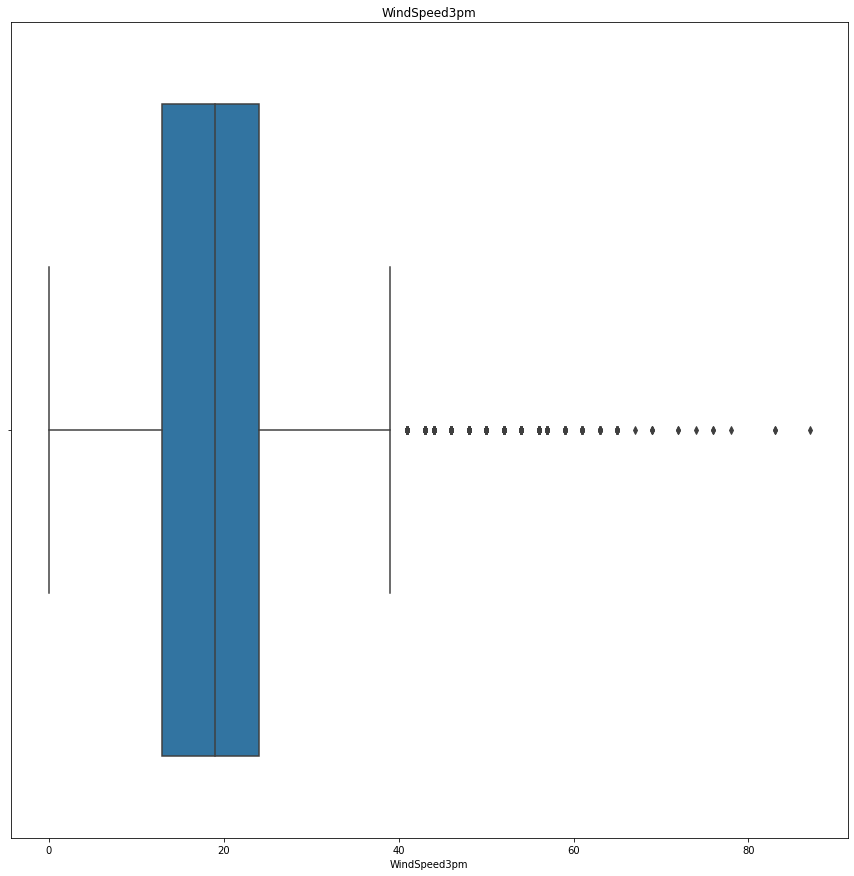

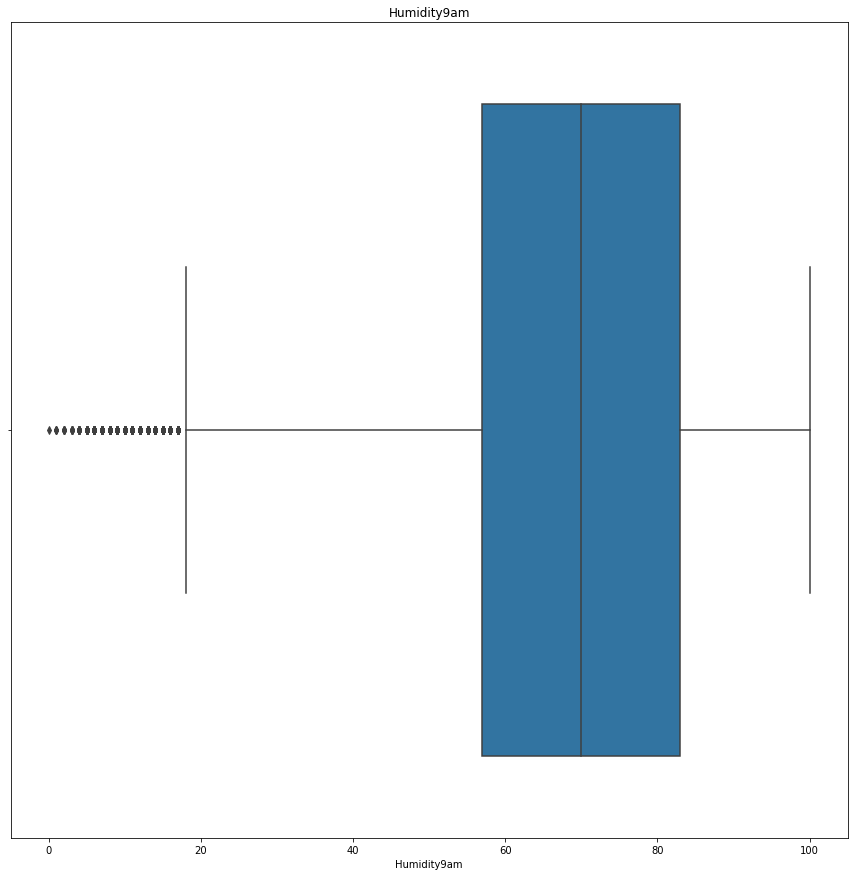

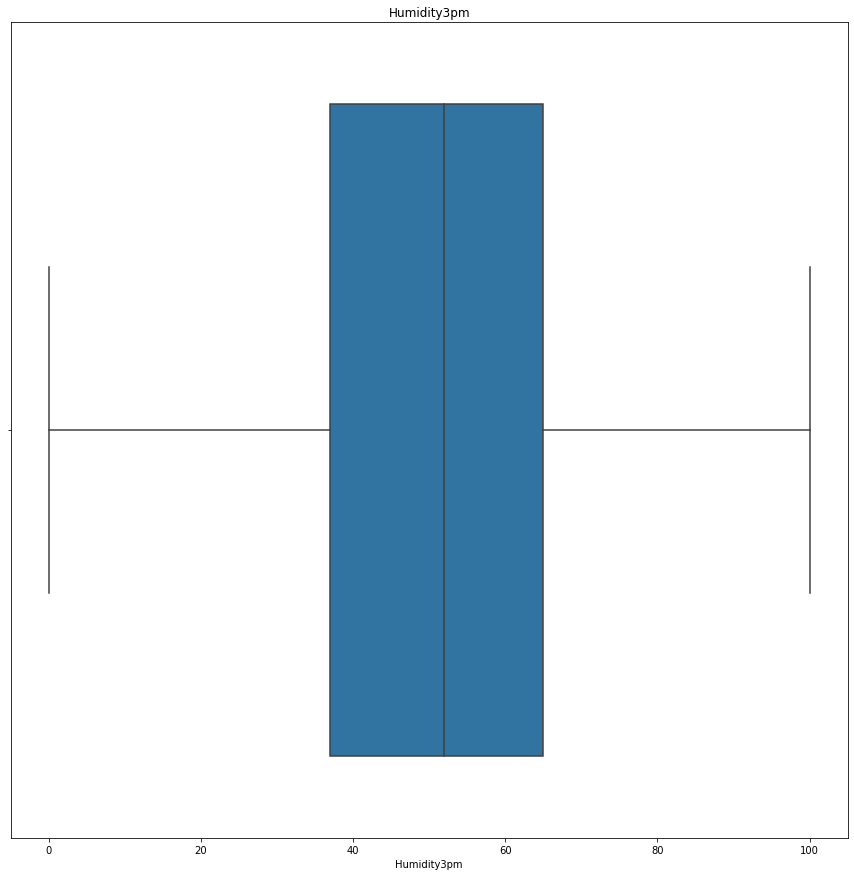

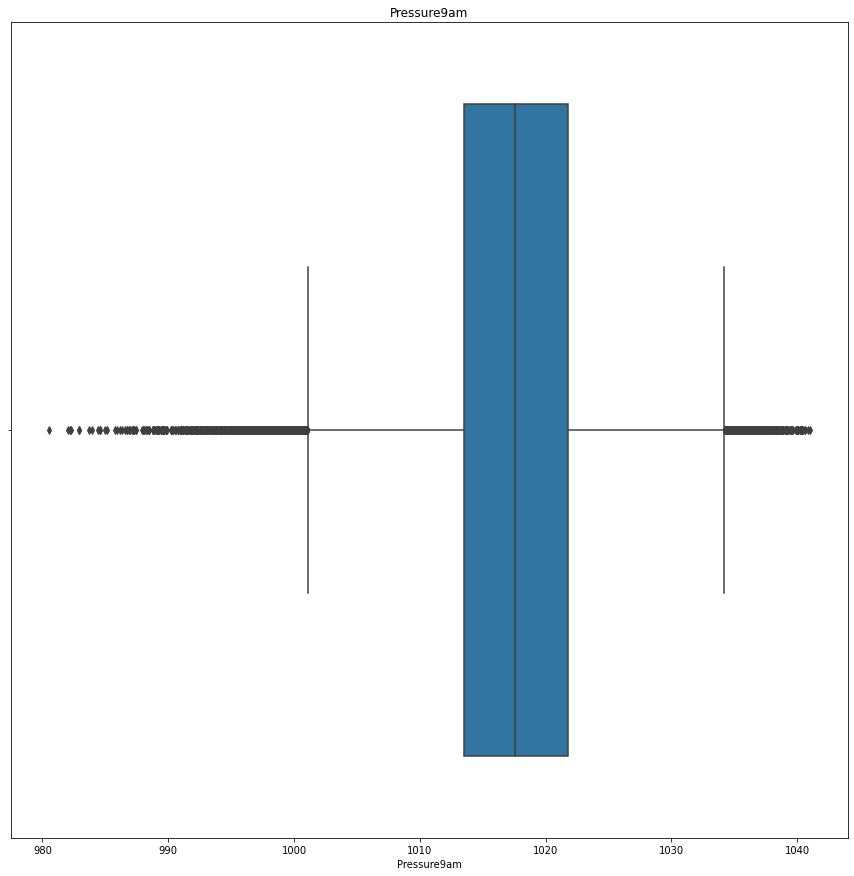

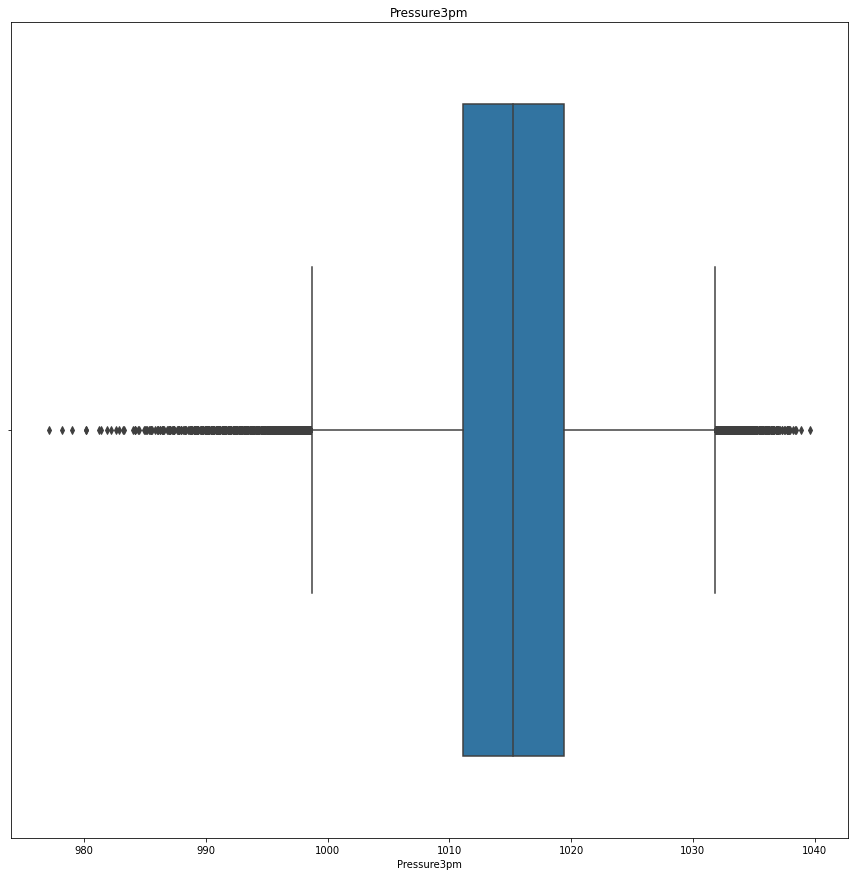

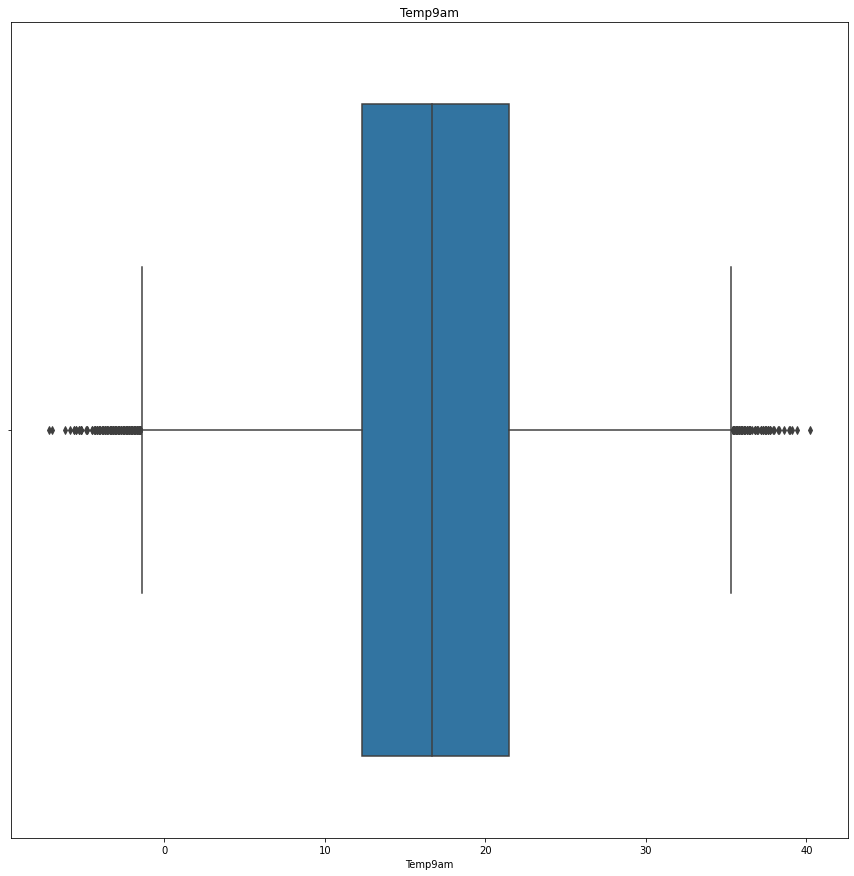

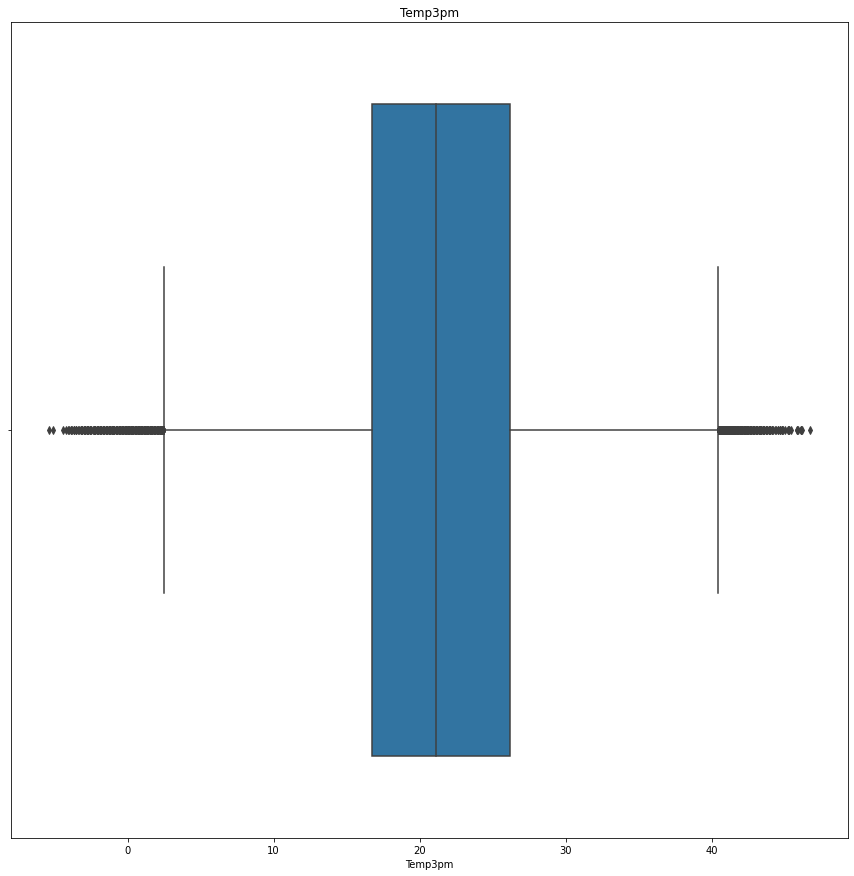

<Figure size 1080x1080 with 0 Axes>

In [90]:
for feature in continuous_feature:
    data3=data.copy()
    sns.boxplot(data3[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [91]:
def qq_plots(data, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


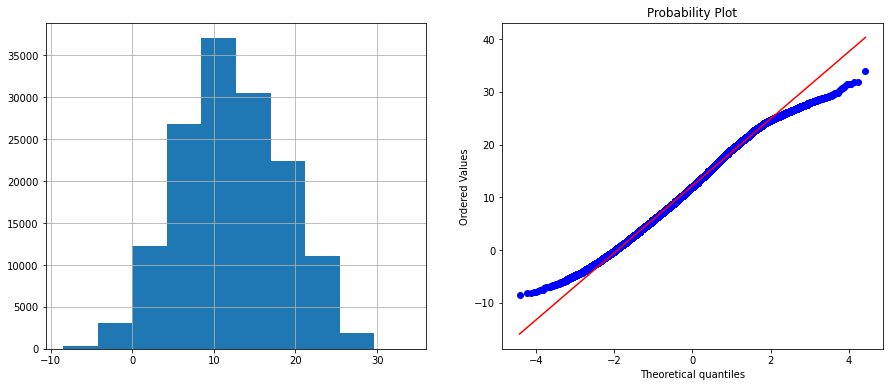

MaxTemp


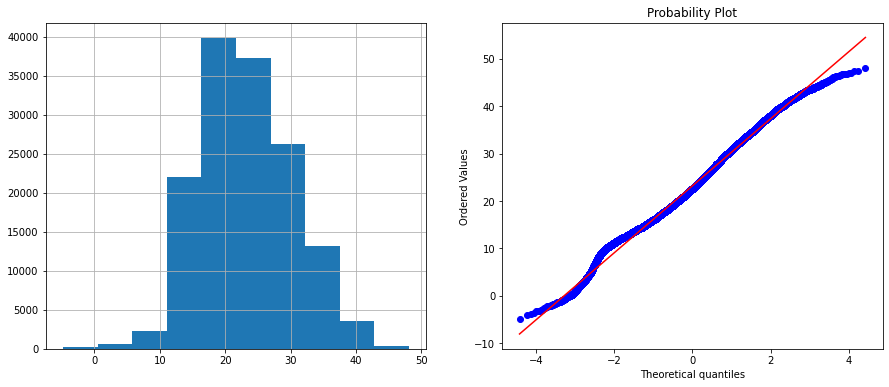

Rainfall


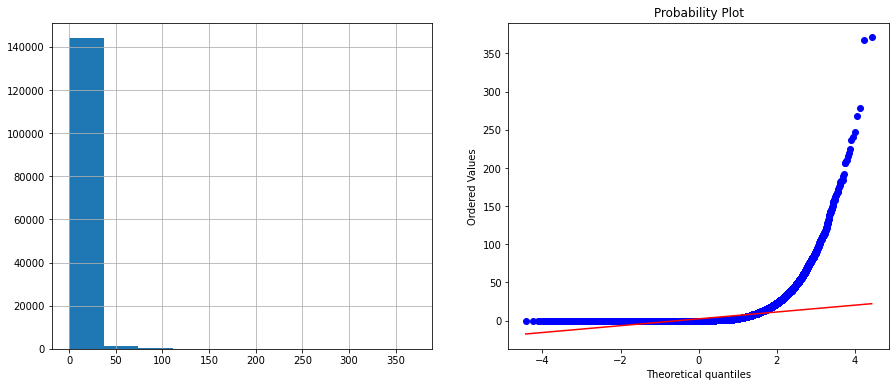

Evaporation


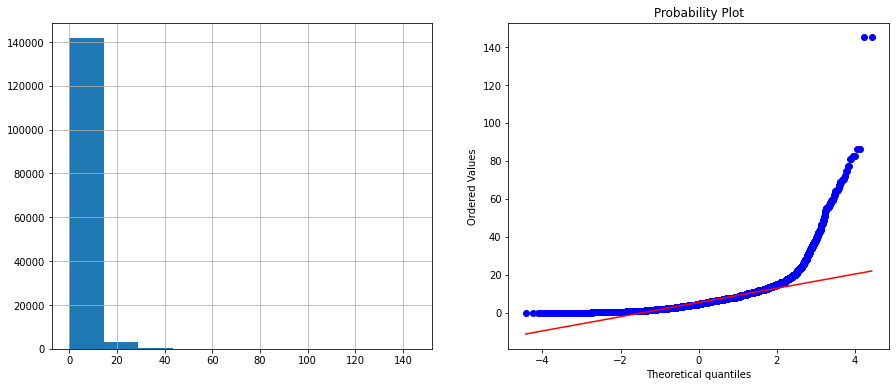

Sunshine


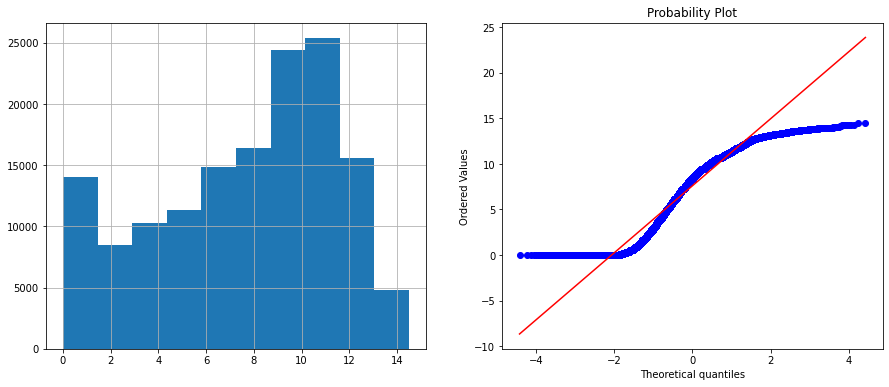

WindGustSpeed


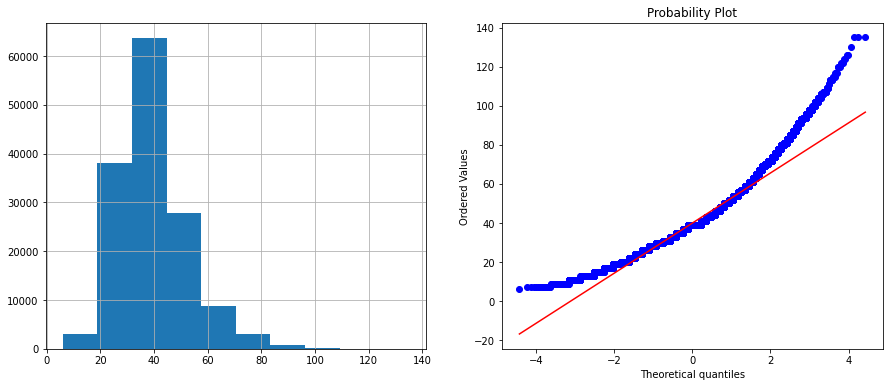

WindSpeed9am


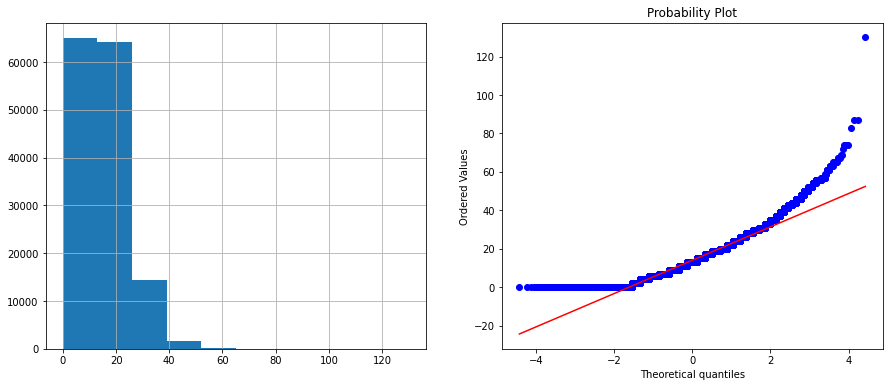

WindSpeed3pm


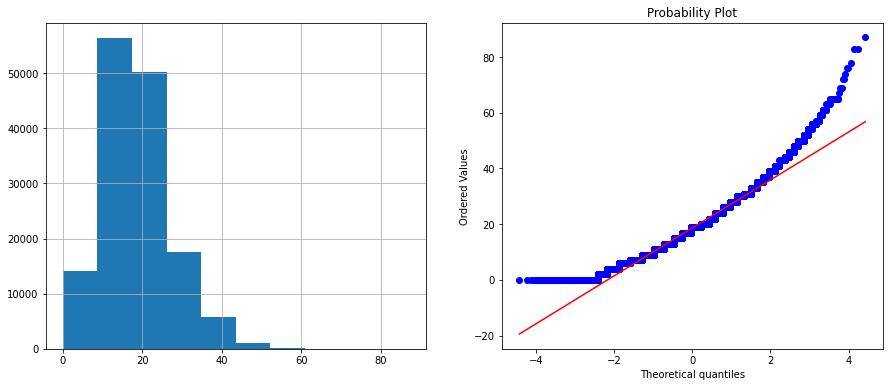

Humidity9am


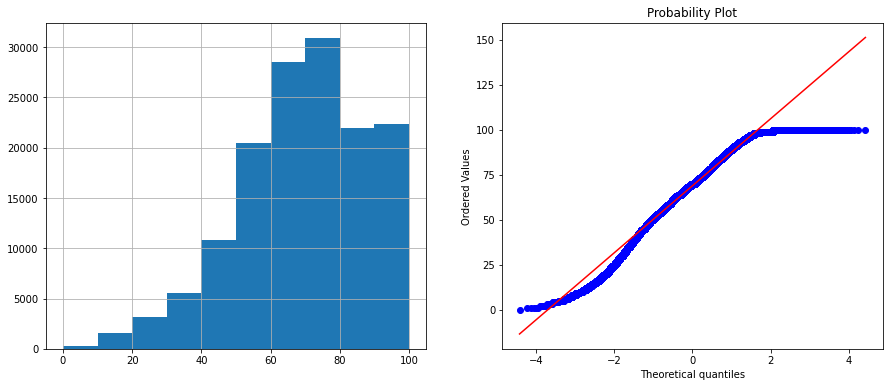

Humidity3pm


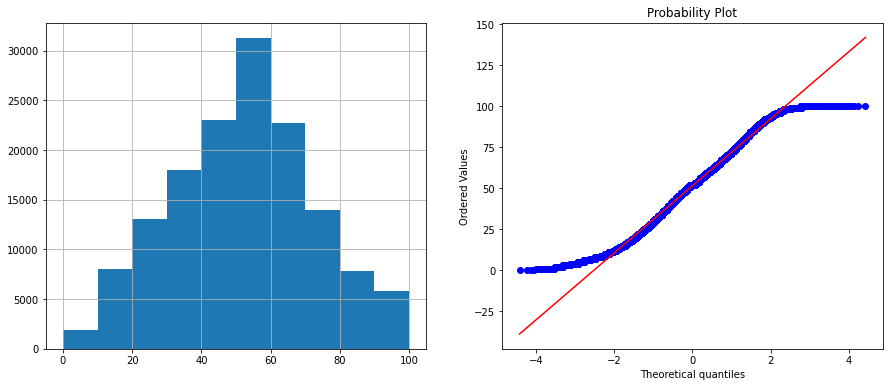

Pressure9am


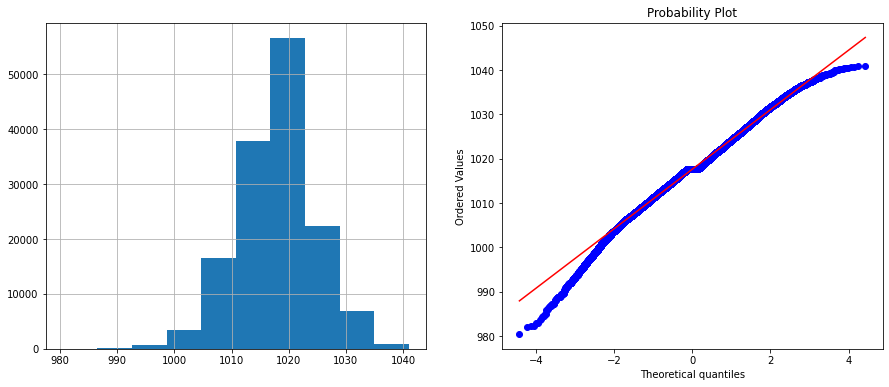

Pressure3pm


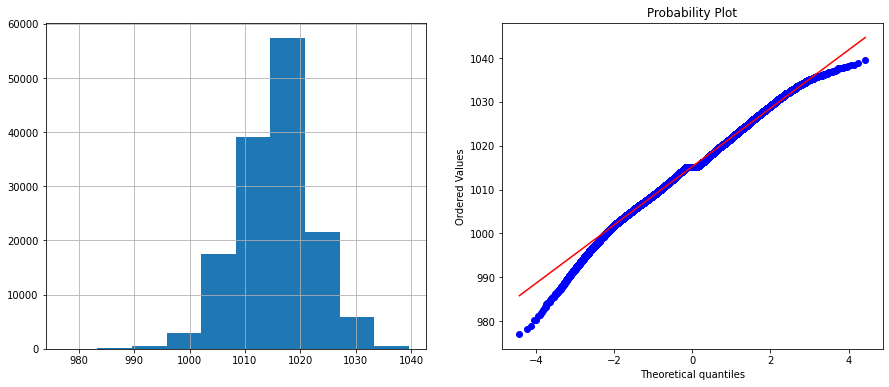

Temp9am


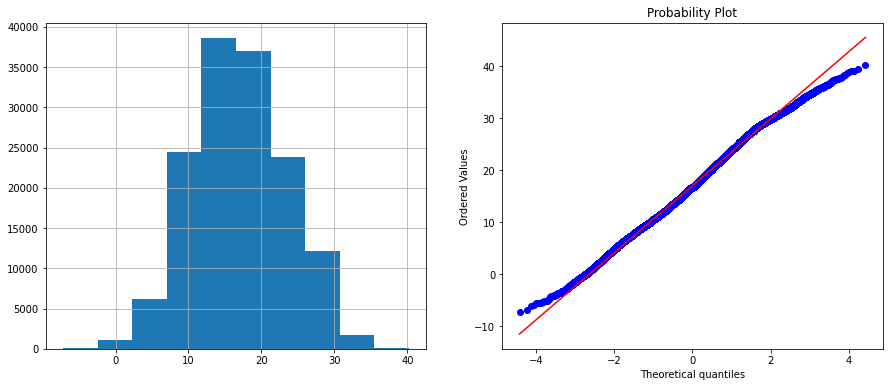

Temp3pm


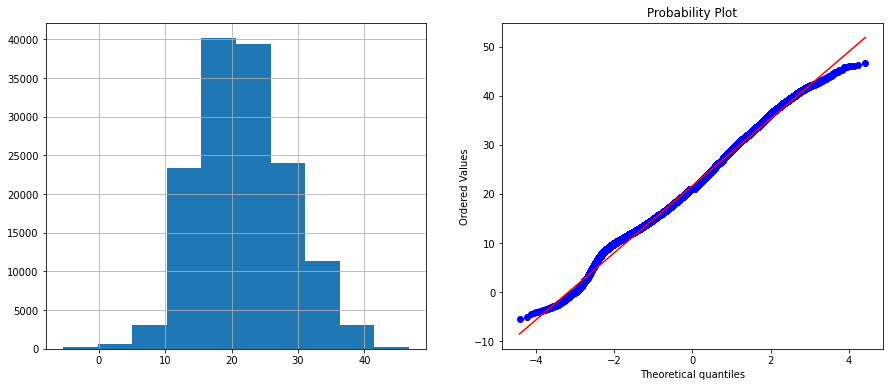

In [92]:
import scipy.stats as stats
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.show()

In [93]:
data.to_csv("Ready_Rainfall_AUS.csv", index=False)

In [94]:
X = data.drop(["RainTomorrow", "Date"], axis=1)
Y = data["RainTomorrow"]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [96]:
# pip install imblearn

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
sm=SMOTE(random_state=0) # we have increased the data points in the miority calss.
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format((y_train)))
print("The number of classes after fit {}".format((y_train_res)))

The number of classes before fit 43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: uint8
The number of classes after fit 0         0
1         0
2         0
3         0
4         0
         ..
181727    1
181728    1
181729    1
181730    1
181731    1
Name: RainTomorrow, Length: 181732, dtype: uint8


In [99]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.0115
0:	total: 28.2ms	remaining: 4m 42s
1:	total: 43.3ms	remaining: 3m 36s
2:	total: 58.3ms	remaining: 3m 14s
3:	total: 75.5ms	remaining: 3m 8s
4:	total: 90ms	remaining: 2m 59s
5:	total: 105ms	remaining: 2m 54s
6:	total: 119ms	remaining: 2m 50s
7:	total: 135ms	remaining: 2m 48s
8:	total: 150ms	remaining: 2m 46s
9:	total: 167ms	remaining: 2m 46s
10:	total: 185ms	remaining: 2m 47s
11:	total: 208ms	remaining: 2m 53s
12:	total: 232ms	remaining: 2m 58s
13:	total: 254ms	remaining: 3m
14:	total: 279ms	remaining: 3m 5s
15:	total: 304ms	remaining: 3m 9s
16:	total: 335ms	remaining: 3m 16s
17:	total: 368ms	remaining: 3m 24s
18:	total: 405ms	remaining: 3m 32s
19:	total: 437ms	remaining: 3m 38s
20:	total: 470ms	remaining: 3m 43s
21:	total: 503ms	remaining: 3m 48s
22:	total: 534ms	remaining: 3m 51s
23:	total: 564ms	remaining: 3m 54s
24:	total: 593ms	remaining: 3m 56s
25:	total: 621ms	remaining: 3m 58s
26:	total: 645ms	remaining: 3m 58s
27:	total: 670ms	remaining: 3m 58s
28:	to

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_cat_p = cat.predict(X_test)  # prediction by cat classifier
print(confusion_matrix(y_test,y_cat_p))
print(accuracy_score(y_test,y_cat_p))
print(classification_report(y_test,y_cat_p))

[[21514  1203]
 [ 2781  3594]]
0.8630551354324213
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22717
           1       0.75      0.56      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7554043848996217

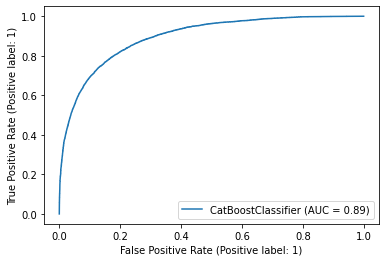

In [101]:
import sklearn
sklearn.metrics.plot_roc_curve(cat, X_test, y_test)
sklearn.metrics.roc_auc_score(y_test, y_cat_p) 

In [102]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [105]:
y_pred_r = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_r))
print(accuracy_score(y_test,y_pred_r))
print(classification_report(y_test,y_pred_r))

[[20621  2096]
 [ 2431  3944]]
0.8443902103671113
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.65      0.62      0.64      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.77     29092
weighted avg       0.84      0.84      0.84     29092



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7632004812842071

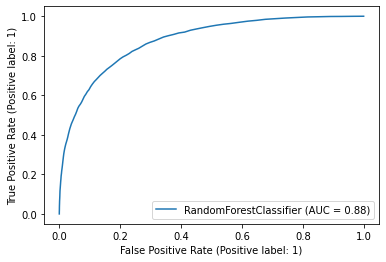

In [106]:
sklearn.metrics.plot_roc_curve(rf, X_test, y_test)
sklearn.metrics.roc_auc_score(y_test, y_pred_r) 

In [107]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
y_pred_lr = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[17742  4975]
 [ 1529  4846]]
0.7764333837481094
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22717
           1       0.49      0.76      0.60      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7705789376013644

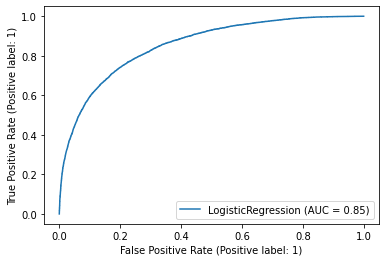

In [109]:
sklearn.metrics.plot_roc_curve(logreg, X_test, y_test)
sklearn.metrics.roc_auc_score(y_test, y_pred_lr) 

In [110]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [111]:
y_pred_g = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred_g))
print(accuracy_score(y_test,y_pred_g))
print(classification_report(y_test,y_pred_g))

[[18235  4482]
 [ 2011  4364]]
0.7768114945689537
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     22717
           1       0.49      0.68      0.57      6375

    accuracy                           0.78     29092
   macro avg       0.70      0.74      0.71     29092
weighted avg       0.81      0.78      0.79     29092



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7436259206416201

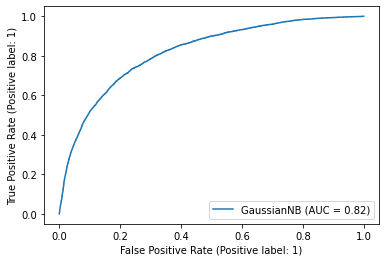

In [112]:
sklearn.metrics.plot_roc_curve(gnb, X_test, y_test)
sklearn.metrics.roc_auc_score(y_test, y_pred_g) 

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [114]:
y_pred_k = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred_k))
print(accuracy_score(y_test,y_pred_k))
print(classification_report(y_test,y_pred_k))

[[17294  5423]
 [ 1779  4596]]
0.7524405334799945
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     22717
           1       0.46      0.72      0.56      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.74      0.69     29092
weighted avg       0.81      0.75      0.77     29092



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7411106375375787

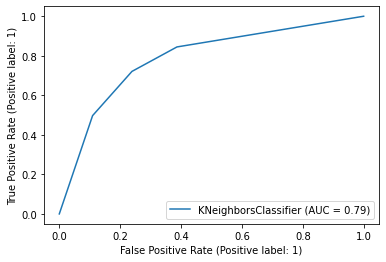

In [115]:
sklearn.metrics.plot_roc_curve(knn, X_test, y_test)
sklearn.metrics.roc_auc_score(y_test, y_pred_k) 

# The Cat Model Performs the Best.
# 86%